<a href="https://colab.research.google.com/github/Travonka/temp/blob/main/econometricsHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import pandas as pd, numpy as np, statsmodels.api as sm, plotly.graph_objects as go, plotly.express as px

In [91]:
df = pd.read_excel('ha01_data01.xls')
df

,age,asvabc,earnings,height,hours,s,siblings,tenure,weight,wexp
0,43,58.99152,22.96,72,35,12,3,4.961538,215,23.134610
1,39,54.62960,23.07,72,40,16,0,7.692307,155,14.230770
2,41,47.81411,9.25,68,28,13,3,3.519231,120,18.557690
3,42,58.44628,27.97,69,55,12,3,5.923077,135,20.211540
4,37,63.35343,7.01,64,20,18,0,0.750000,130,8.711538
...,...,...,...,...,...,...,...,...,...,...
61,39,36.36409,20.94,60,45,12,7,2.000000,99,19.846150
62,39,64.98915,28.38,66,42,14,3,14.134610,138,15.307690
63,41,56.26532,8.59,66,40,12,4,2.230769,187,22.615390
64,41,45.63316,10.50,66,15,12,4,1.019231,120,10.115390


# 3.1

In [92]:
px.scatter(df, x ='tenure', y = 'earnings', title='Earnings against tenure')

Looking at the scatter plot it seems that there is a positive relation between tenure and earnings

In [93]:
x = df['tenure']
y = df['earnings']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

con, slope = result.params

plot = px.scatter(df, x ='tenure', y = 'earnings', title='Earnings against tenure')
plot.add_trace(go.Scatter(
 x=df.tenure,
 y=slope*df.tenure + con,
 mode="lines",
 line=go.scatter.Line(color="red"),
 showlegend=True, name='OLS'))
plot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Regression line confirms that there is a linear(almost) dependency between tenure and earnings

In [94]:
df['earning_residuals'] = df.earnings - slope*df.tenure + con
px.scatter(df, x='tenure', y='earning_residuals',
 title='Scatter plot of Earnings\' residuals against Tenure')

As we can see, most of the residuals falls into [-10;10] interval that can mean, that there is some evidence to the model correctness

In [95]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.425
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0137
Time:                        19:20:27   Log-Likelihood:                -238.95
No. Observations:                  66   AIC:                             481.9
Df Residuals:                      64   BIC:                             486.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0352      1.839      8.177      0.0

As we can see from above. we have low R-squared number, which can mean, that regression model does not fit good the data

Our estimated equation is y = 0.4362 * x + 15.0352
That means, at 0 tenure the expected earnings are ~15 and each 1 point increment in tenure it raises by 0.4362

We have low R-squared value and low p-value ( as a result of hight t statistic) which can mean that quality of estimation using linear regression is poor


# 3.2

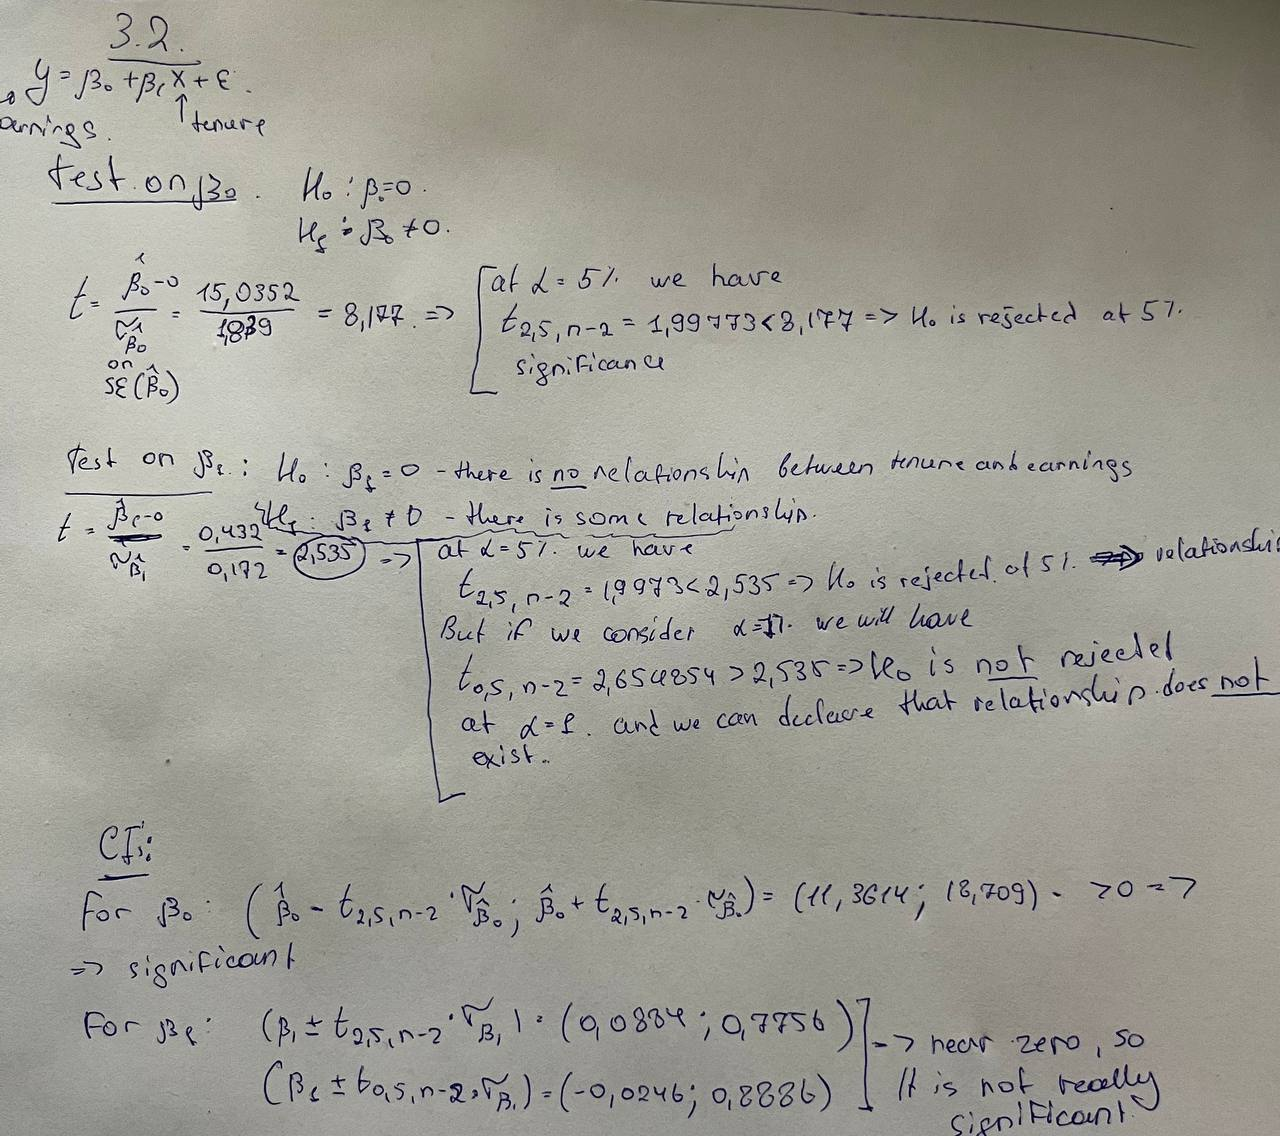

In [96]:
tmp = (slope*df.tenure + con)
diff = tmp - df.earnings.mean()
print(f'Regression sum of squares is {round(np.dot(diff, diff), 4)}')


Regression sum of squares is 541.3148


In [97]:
diff = (slope*df.tenure + con) - df.earnings
print(f'Error (residual) sum of squares is {round(np.dot(diff, diff), 4)}')

Error (residual) sum of squares is 5392.1719


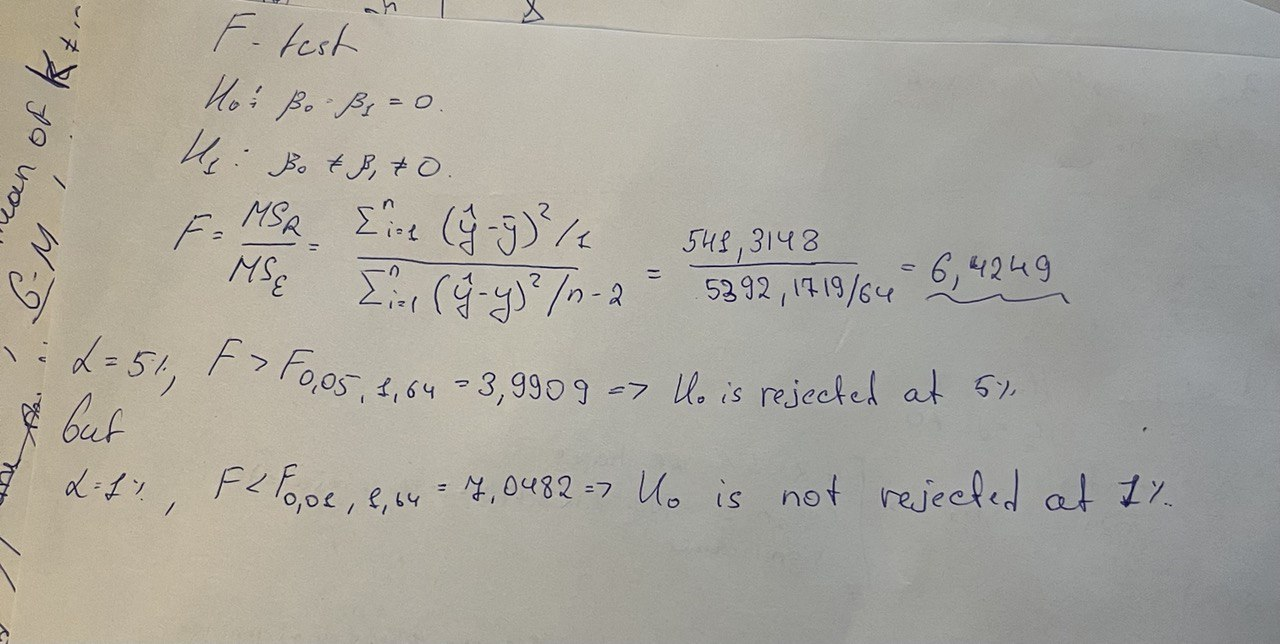

Looking at the F test we can say that we have weak evidence that our model is significant

# 3.3

Regress earnings on s:

In [98]:
x = df['s']
y = df['earnings']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.090
Date:                Wed, 05 Oct 2022   Prob (F-statistic):            0.00979
Time:                        19:20:27   Log-Likelihood:                -238.64
No. Observations:                  66   AIC:                             481.3
Df Residuals:                      64   BIC:                             485.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5529      6.912      0.080      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



For every unit additional unit of s, earnings increases by 1.3776. When s = 0, then earnings are equal to 0.5529

In [99]:
df.s.describe()

count    66.000000
mean     13.181818
std       2.190252
min       8.000000
25%      12.000000
50%      12.000000
75%      14.000000
max      20.000000
Name: s, dtype: float64

Basically, regression of earnings on h = s - 12 means "years of schooling - 12". Lets regress it:

In [100]:
df['h'] = df.s - 12
X = sm.add_constant(df.h)
y = df.earnings
regression = sm.OLS(y, X)
results = regression.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.090
Date:                Wed, 05 Oct 2022   Prob (F-statistic):            0.00979
Time:                        19:20:27   Log-Likelihood:                -238.64
No. Observations:                  66   AIC:                             481.3
Df Residuals:                      64   BIC:                             485.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0839      1.280     13.347      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The coef remains the same , but now when s = 0 earnings are 17.0839

As we can see, most of regression attributes has not changed. But differences exists if we look at intercept which caused p -value, t-statistics and etc to change because scale has changed. R-squared is indifferent to scale as well as F-statistic thats why they have not changed. Basically, we still have the same model

# 3.4

In [101]:
x = df['asvabc']
y = df['earnings']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()
print(result.summary())
con, slope = result.params

plot = px.scatter(df, x ='asvabc', y = 'earnings', title='Earnings on asvabc')
plot.add_trace(go.Scatter(
 x=df.asvabc,
 y=slope*df.asvabc + con,
 mode="lines",
 line=go.scatter.Line(color="red"),
 showlegend=True, name='OLS'))
plot.show()

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7.767
Date:                Wed, 05 Oct 2022   Prob (F-statistic):            0.00699
Time:                        19:20:27   Log-Likelihood:                -238.33
No. Observations:                  66   AIC:                             480.7
Df Residuals:                      64   BIC:                             485.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6814      6.212      0.271      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



It looks like there is a connection between quality of education and earnings. Seems reasonable

In [102]:
x = df['wexp']
y = df['earnings']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()
print(result.summary())
con, slope = result.params

plot = px.scatter(df, x ='wexp', y = 'earnings', title='Earnings on wexp')
plot.add_trace(go.Scatter(
 x=df.wexp,
 y=slope*df.wexp + con,
 mode="lines",
 line=go.scatter.Line(color="red"),
 showlegend=True, name='OLS'))
plot.show()

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.487
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0133
Time:                        19:20:27   Log-Likelihood:                -238.92
No. Observations:                  66   AIC:                             481.8
Df Residuals:                      64   BIC:                             486.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7058      4.088      2.130      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The more you work ( in terms of experience) -> more money you have. It looks like there is a reasonable connection between work experience and earnings

In [103]:
x = df['hours']
y = df['earnings']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()
print(result.summary())
con, slope = result.params

plot = px.scatter(df, x ='hours', y = 'earnings', title='Earnings against hours')
plot.add_trace(go.Scatter(
 x=df.hours,
 y=slope*df.hours + con,
 mode="lines",
 line=go.scatter.Line(color="red"),
 showlegend=True, name='OLS'))
plot.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.145
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0809
Time:                        19:20:27   Log-Likelihood:                -240.52
No. Observations:                  66   AIC:                             485.0
Df Residuals:                      64   BIC:                             489.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1693      4.954      2.053      0.0

Same here. More hours you spend working the more you earn. So, there is also reasonable connection

In [107]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/econometricsHW1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/econometricsHW1.ipynb to html
[NbConvertApp] Writing 819381 bytes to /content/drive/MyDrive/ColabNotebooks/econometricsHW1.html
